Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 06: Wavelet Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, January 6, 2025**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is intended to revise the notions of eigenvectors and eigenvalues, which will pop up in class soon.  Check if you are comfortable with them. You don't need a deep understanding, but you should have got the basic ideas.  If you have problems to answer these questions offhand, this is a good time to look terms up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

An eigenvector is a vector that stays on its' span after any transformation. It does not get rotated off this span. It only gets stretched out or squished by a certain factor which is called the eigenvalue of the eigenvector.

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Filter design and frequency space (5 points)

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the kernel size. What do you observe?

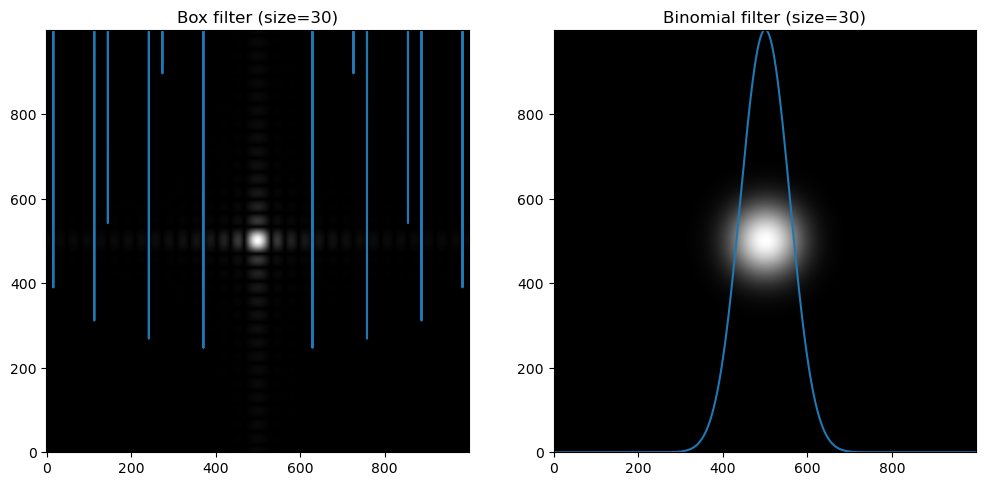

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.ndimage import convolve

kernel_size = 30 # vary this #20 , 22, 24, 26, 28, 30
image_size = 1000

# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

# YOUR CODE HERE
# compute box kernel
box_kernel[image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1,
           image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1] = 1


# compute binomial kernel
# create binomial coefficients
binomial_coeffs = binom(kernel_size, np.arange(kernel_size + 1))
binomial_1d = binomial_coeffs / binomial_coeffs.sum()  # Normalize to sum to 1
# create 2d binomial kernel by using outer product with itself
binomial_kernel_2d = np.outer(binomial_1d, binomial_1d) #
# kernel
binomial_kernel[image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1,
                image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1] = binomial_kernel_2d


box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

box filter: sharp edges, sinc-like pattern, narrower/shorter by increasing kernel size 
binomial filter: gaussian curve, becomes narrower by increasing kernel size


**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_{\max}$. What do you observe? Explain that observation and discuss how to improve the result.

Hint: The low pass filter is shown in CV-06 slides 45. 

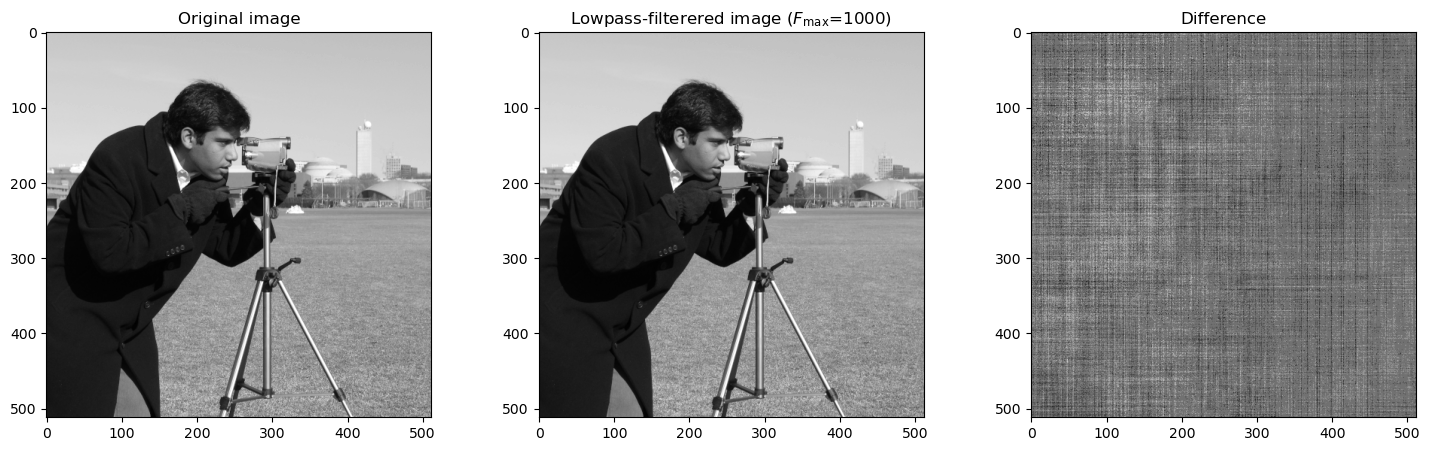

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

f_max = 1000
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    #result = image

     # YOUR CODE HERE
    # FFT of the image
    fft_image= np.fft.fftshift(np.fft.fft2(image))

    #low-pass filter (u,v = rows,columns (cordinates))
    u,v = image.shape
    cor_u, cor_v = u // 2, v//2
    mask = np.zeros((u,v), dtype=float)

    # apply function in frquency space
    for i in range(u):
        for j in range(v):
            if np.sqrt((i - cor_u)**2 + (j - cor_v)**2) <= f_max:
                mask[i,j] = 1
    
    # inverse Fourier Transform
    filtered_image = np.fft.ifft2(np.fft.ifftshift(fft_image*mask))
    result = np.abs(filtered_image)
    return result

filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

high f_max: more high frequencys -> more noise and less attenuation
low f_max: removing noise and high frequencies, loss of information

improvement: 
+ no aprupt but smooth cut-off
+ apply series of filter and successively increase f_max

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

Good kernel size based on standard deviation to take most of the gaussian bell-shaped curve into account.

"Faustformel" = Sigma*3

## Assignment 2: Discrete Cosine Transform (5 points)

**a)** Read up about the DCT and IDCT functions and check out the scipy implementation.

In [1]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct

Text(0.5, 1.0, 'Restored Image')

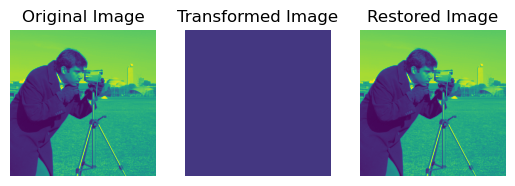

In [2]:
def dct_2d_sp(array, type_=2):
    return dct(dct(array, axis=0, type=type_), axis=1, type=type_)

def idct_2d_sp(array, type_=2):
    return idct(idct(array, axis=0, type=type_), axis=1, type=type_)


img = iio.imread("imageio:camera.png")
img_transformed = dct_2d_sp(img)
img_orig = idct_2d_sp(img_transformed)

plt.subplot(131); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(132); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')
plt.subplot(133); plt.imshow(img_orig); plt.axis('off'); plt.title('Restored Image')

**b)** Implement the DCT-II function given by the formula: $C_k = 2 \sum_{n=0}^{N-1} f_n \cos\left(\frac{\pi k(2n+1)}{2N} \right)$

False


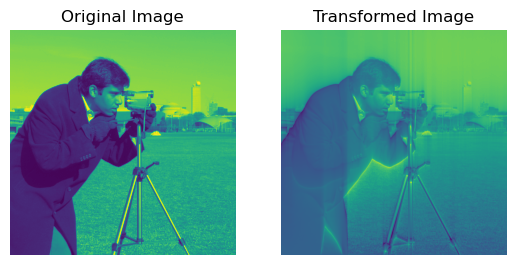

In [14]:
def my_dct2_1d(f, axis=0):
    C = np.zeros_like(f, dtype=np.float64)
    
    # YOUR CODE HERE
    N = f.shape[axis]
    
    # Iterate over all k values (the DCT coefficients)
    for k in range(N):
        # For each k, compute the DCT-II coefficients
        for n in range(N):
            # Use the DCT-II formula
            C[k] += f[n] * np.cos(np.pi * k * (2 * n + 1) / (2 * N))

        # Apply normalization
        if k == 0:
            C[k] *= np.sqrt(1 / N)
        else:
            C[k] *= np.sqrt(2 / N)
            
    return C


def my_dct2_2d(f):
    return my_dct2_1d(my_dct2_1d(f, axis=0), axis=1)


img = iio.imread("imageio:camera.png")
img_transformed = my_dct2_2d(img)

plt.subplot(121); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(122); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')

print((img_transformed.round() == dct_2d_sp(img, type_=2).round()).all())

**c)** Implement the DCT-III function given by the formula: $C_k = f_0 + 2 \sum_{n=1}^{N-1} f_n \cos\left(\frac{\pi(2k+1)n}{2N}\right)$

False


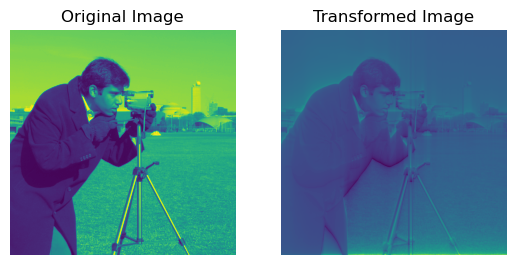

In [34]:
def my_dct3_1d(f, axis=0):
    C = np.zeros_like(f, dtype=np.float64)

    # YOUR CODE HERE
    N = f.shape[axis]
    scaling = np.sqrt(2 / N)
    
    # Iterate over all k values (the DCT-III coefficients)
    for k in range(N):

        # Start with the first term (f_0)
        C[k] = f[0]

        # For each k, compute the DCT-III coefficients
        for n in range(1, N):
            C[k] += f[n] * np.cos(np.pi * (2 * k + 1) * n / (2 * N))
    
        C[k] *= scaling if k > 0 else np.sqrt(1 / N)

    return C


def my_dct3_2d(f):
    return my_dct3_1d(my_dct3_1d(f, axis=0), axis=1)


img = iio.imread("imageio:camera.png")
img_transformed = my_dct3_2d(img)

plt.subplot(121); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(122); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')

print((img_transformed.round() == dct_2d_sp(img, type=3).round()).all())


**d)** What relationship between the DCT-II, DCT-III, IDCT-II and IDCT-III can be observed? Demonstrate your findings. (If you did not solve exercises b and c, you may use provided `dct_2d_sp` function).

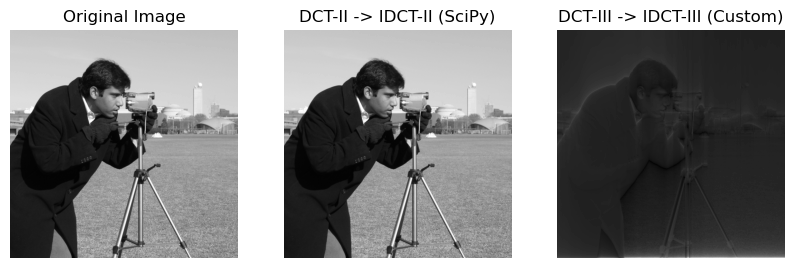

True


In [30]:
normalize = lambda x: x.astype(np.float64)/np.max(x)

img = iio.imread("imageio:camera.png")
img = normalize(img)

# Define IDCT-III function (1D) since dct_2d_sp does not include this
def my_idct3_1d(C, axis=0):
    N = C.shape[axis]
    f = np.zeros_like(C, dtype=np.float64)
    
    # Apply the IDCT-III formula
    for n in range(N):
        f[n] = C[0] / 2  # The first term is scaled by 1/2
        for k in range(1, N):
            f[n] += C[k] * np.cos(np.pi * (2 * n + 1) * k / (2 * N))
    return f

# IDCT-III function (2D)
def my_idct3_2d(C):
    return my_idct3_1d(my_idct3_1d(C, axis=0), axis=1)

# Apply DCT-II and IDCT-II (using scipy functions)
img_transformed_dct2_sp = dct_2d_sp(img, type=2)
img_reconstructed_dct2_sp = idct_2d_sp(img_transformed_dct2_sp, type=2)

# Apply DCT-III and IDCT-III (using our functions)
img_transformed_dct3 = my_dct3_2d(img)
img_reconstructed_dct3 = my_idct3_2d(img_transformed_dct3)

# Visualize the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# DCT-II -> IDCT-II Reconstructed Image (using scipy)
plt.subplot(1, 3, 2)
plt.imshow(img_reconstructed_dct2_sp, cmap='gray')
plt.title('DCT-II -> IDCT-II (SciPy)')
plt.axis('off')

# DCT-III -> IDCT-III Reconstructed Image
plt.subplot(1, 3, 3)
plt.imshow(img_reconstructed_dct3, cmap='gray')
plt.title('DCT-III -> IDCT-III (Custom)')
plt.axis('off')

plt.show()

# Check if the reconstructed images are close to the original
print((img.round() == img_orig.round()).all())

DCT-II tranforms the image into a set of coefficients that represent important features of the image while IDCT-II is the reverse process that turns these coefficients back into an image.
DCT-III is similar to DCT-II but with a different transformation formula. Again, the inverse IDCT-III recreates these numbers into the original image.
To sum up, both DCT functions are used to tranform an image but with our image DCT-II works better for compressing images. Both the inverse function recover the original images from the transformed ones.

## Assignment 3: Wavelet Transform (5 points)

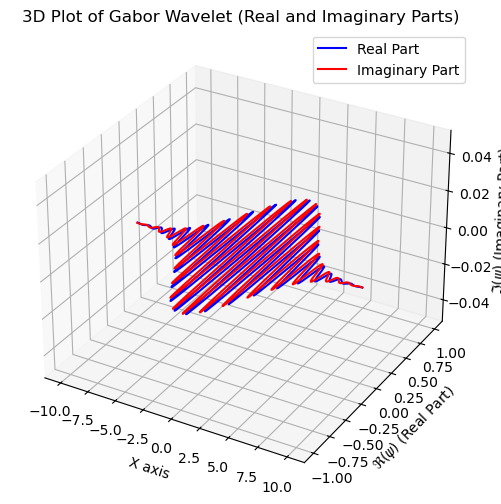

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to transform a mother wavelet
def wavelet(mother_wavelet, s=0, d=0):
    if s <= 0:
        raise ValueError("Scale `s` must be positive")
    func = lambda x: (1 / np.sqrt(s)) * mother_wavelet((x - d) / s)
    return func

# Define the Gabor mother wavelet
def gabor_mother_wavelet(x, sigma=3, k=1):
    real = np.exp(-x**2 / (2 * sigma**2))
    complex_part = np.exp(-1j * k * x)
    return real * complex_part

# Define the parameters
sigma = 3
s = 1  # Scale
d = 0  # Translation
k = 2 * np.pi  # Frequency

# Create the wavelet function from the Gabor mother wavelet
gabor_wavelet = wavelet(lambda x: gabor_mother_wavelet(x, sigma=sigma, k=k), s=s, d=d)

# Generate data
x = np.linspace(-10, 10, 500)
wavelet_values = gabor_wavelet(x)

# Extract real and imaginary parts
real_part = wavelet_values.real
imag_part = wavelet_values.imag

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot the real and imaginary parts
ax.plot(x, real_part, zs=0, zdir='z', label="Real Part", color='b')
ax.plot(x, imag_part, zs=0, zdir='z', label="Imaginary Part", color='r')

# Add labels and legend
ax.set_title("3D Plot of Gabor Wavelet (Real and Imaginary Parts)")
ax.set_xlabel("X axis")
ax.set_ylabel("$\Re(\psi)$ (Real Part)")
ax.set_zlabel("$\Im(\psi)$ (Imaginary Part)")
ax.legend()

plt.show()


**a)** Write a function that transforms a mother wavelet into a wavelet function.

In [39]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def wavelet(mother_wavelet, s=0, d=0):
    if s <= 0:
        raise ValueError("s must be positive")
    func = lambda x: (1/np.sqrt(s)) * mother_wavelet((x-d)/s)
    return func


**b)** Write a function for the Gabor mother wavelet.

In [40]:
def gabor_mother_wavelet(x, sigma=1, k=1):
    real = np.exp(-x**2 / (2 * sigma**2))
    complex_part = np.exp(-1j * k * x)
    return real * complex_part

imaginery part: exp(−ikx) can be separated as cos⁡(kx)−i*sin⁡(kx)

**c)** Plot the real and imaginary part of the gabor wavelet. Use the Interval $\left[ -10, 10 \right]$ and $\sigma=3$.

-c und d sind dasselbe??

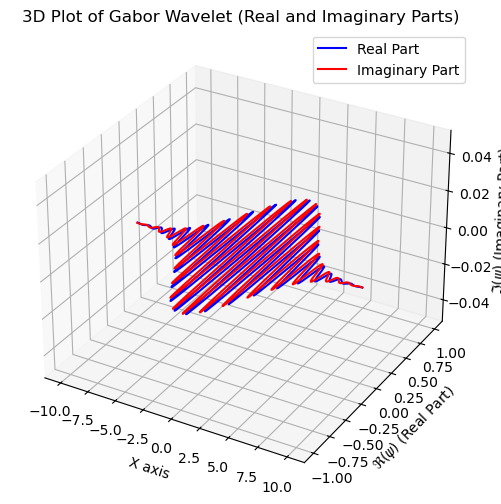

In [48]:
# parameters
sigma = 3
s = 1 
d = 0 
k = 2 * np.pi  # Frequency

# wavelet function from Gabor mother wavelet
gabor_wavelet = wavelet(lambda x: gabor_mother_wavelet(x, sigma=sigma, k=k), s=s, d=d)

# data
x = np.linspace(-10, 10, 500)
wavelet_values = gabor_wavelet(x)

# real and imaginary parts
real_part = wavelet_values.real
imag_part = wavelet_values.imag

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot the real and imaginary parts
ax.plot(x, real_part, label="Real Part", color='b')
ax.plot(x, imag_part, label="Imaginary Part", color='r')

# Add labels and legend
ax.set_title("3D Plot of Gabor Wavelet (Real and Imaginary Parts)")
ax.set_xlabel("X axis")
ax.set_ylabel("$\Re(\psi)$ (Real Part)")
ax.set_zlabel("$\Im(\psi)$ (Imaginary Part)")
ax.legend()

plt.show()

**d)** Plot the real and imaginary part of the gabor wavelet in 3d. Use the Interval $\left[ -10, 10 \right]$ and $\sigma=3$.

NotImplementedError: 

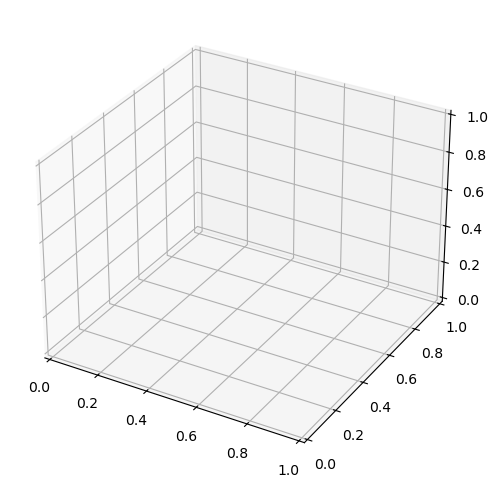

In [49]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
# YOUR CODE HERE
raise NotImplementedError()
ax.set_xlabel("X axis")
ax.set_ylabel("$\Re(e^{ix})$")
ax.set_zlabel("$\Im(e^{ix})$")
plt.show()

**e)** Implement the Haar Basis Wavelet and the Haar Scale Wavelet.

In [ ]:
def haar_basis_wavelet(x):
    ret = np.zeros(x.shape)
    # YOUR CODE HERE
    raise NotImplementedError()
    return ret


def haar_scale_wavelet(x):
    ret = np.zeros(x.shape)
    # YOUR CODE HERE
    raise NotImplementedError()
    return ret

x = np.linspace(-1, 3, 100)
plt.grid()
plt.plot(x, haar_basis_wavelet(x), label="Basis Wavelet $\psi$")
plt.plot(x, haar_scale_wavelet(x), label="Scaling Wavelet $\phi$")
plt.legend()
plt.title("Haar Wavelet Function")
plt.show()